In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

%cd /content/drive/MyDrive/Projects/Youtube

Mounted at /content/drive/
/content/drive/MyDrive/Projects/Youtube


In [ ]:
!ls

Data  models  pneumonia_classification


In [ ]:
!unzip Data/rsna-pneumonia-detection-challenge.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/stage_2_train_images/d5252a78-3ea1-48e9-9ffb-e7535be3ce80.dcm  
  inflating: /content/stage_2_train_images/d525eafb-8908-45fd-a942-48d07c435487.dcm  
  inflating: /content/stage_2_train_images/d5265640-17db-4880-866d-d2952e32941c.dcm  
  inflating: /content/stage_2_train_images/d5277276-f8f8-40e9-b8e1-791cf5d96ac0.dcm  
  inflating: /content/stage_2_train_images/d528d9e9-647a-4e2e-a16c-bd5e32a5bbf5.dcm  
  inflating: /content/stage_2_train_images/d5293a3e-f050-4b98-8bbf-1f40e25bced5.dcm  
  inflating: /content/stage_2_train_images/d52cbb5a-1d0a-457d-8c72-0f7aeec21ca7.dcm  
  inflating: /content/stage_2_train_images/d52ce67b-be7c-4349-8dc4-38562928d208.dcm  
  inflating: /content/stage_2_train_images/d535a3c8-c4a4-4856-b5cd-17f6332eac8b.dcm  
  inflating: /content/stage_2_train_images/d5360dc4-6bea-4a7b-bc49-5b2547ad7877.dcm  
  inflating: /content/stage_2_train_images/d5364bc1-bc2a-4bd0-a1bd-0cfb5a369ccc.dcm  
  i

In [ ]:
!pip install pydicom

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 7.0 MB/s eta 0:00:00


In [ ]:
from pathlib import Path
import pydicom
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
labels_csv = pd.read_csv("/content/stage_2_train_labels.csv")

labels_csv.head()

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1


In [ ]:
labels_csv["patientId"].value_counts()

patientId
3239951b-6211-4290-b237-3d9ad17176db    4
31764d54-ea3b-434f-bae2-8c579ed13799    4
1c44e0a4-4612-438f-9a83-8d5bf919cb67    4
8dc8e54b-5b05-4dac-80b9-fa48878621e2    4
349f10b4-dc3e-4f3f-b2e4-a5b81448ce87    4
                                       ..
7233ab9f-7fa6-4b5b-acdc-1c93bf945db5    1
722cca4a-f542-47ba-be14-29238c1124e1    1
722ad9c3-919a-4c08-bb67-cafd603ba754    1
7228bf11-3ce7-47f5-bee3-d36325df1dc8    1
943b27f1-ba1c-415b-b738-7b52aefa445b    1
Name: count, Length: 26684, dtype: int64

In [ ]:
labels_csv = labels_csv.drop_duplicates("patientId")

In [ ]:
labels_csv["patientId"].value_counts()

patientId
0004cfab-14fd-4e49-80ba-63a80b6bddd6    1
bbd92872-acee-4b27-98b7-07faa4e90919    1
bab85bc8-80d9-4781-b5f7-2d143e56625e    1
bab71d24-89ad-4ae5-bbc1-4d0b6fefcc52    1
baac5ed4-b582-4c80-bd2d-acb97c52806e    1
                                       ..
6cae5af4-d7b9-4a62-ae00-51c10748e672    1
6cab36ad-98de-4ed3-b6a8-ae4621be9044    1
6caa9d84-36c3-48b5-9170-adb736c53e5c    1
6ca9f96b-f164-4022-8c4d-28eed6214c4f    1
c1f7889a-9ea9-4acb-b64c-b737c929599a    1
Name: count, Length: 26684, dtype: int64

In [ ]:
root = Path("/content/stage_2_train_images")

In [ ]:
file_name = labels_csv["patientId"][0]

file_path = root.joinpath(file_name).with_suffix(".dcm")
file_path

PosixPath('/content/stage_2_train_images/0004cfab-14fd-4e49-80ba-63a80b6bddd6.dcm')

In [ ]:
dcm_file = pydicom.read_file(file_path)
dcm_file

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 202
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.28530.1517874485.775526
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.28530.1517874485.775526
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time      

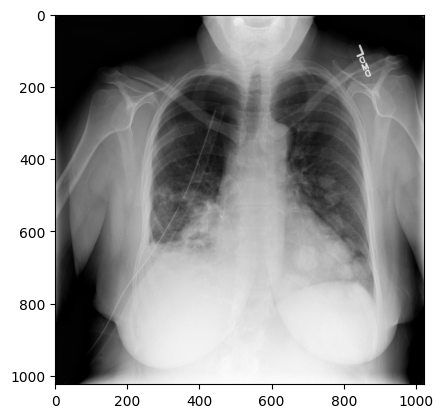

In [ ]:
plt.imshow(dcm_file.pixel_array, cmap="gray")

In [ ]:
labels_csv["Target"].value_counts()

Target
0    20672
1     6012
Name: count, dtype: int64

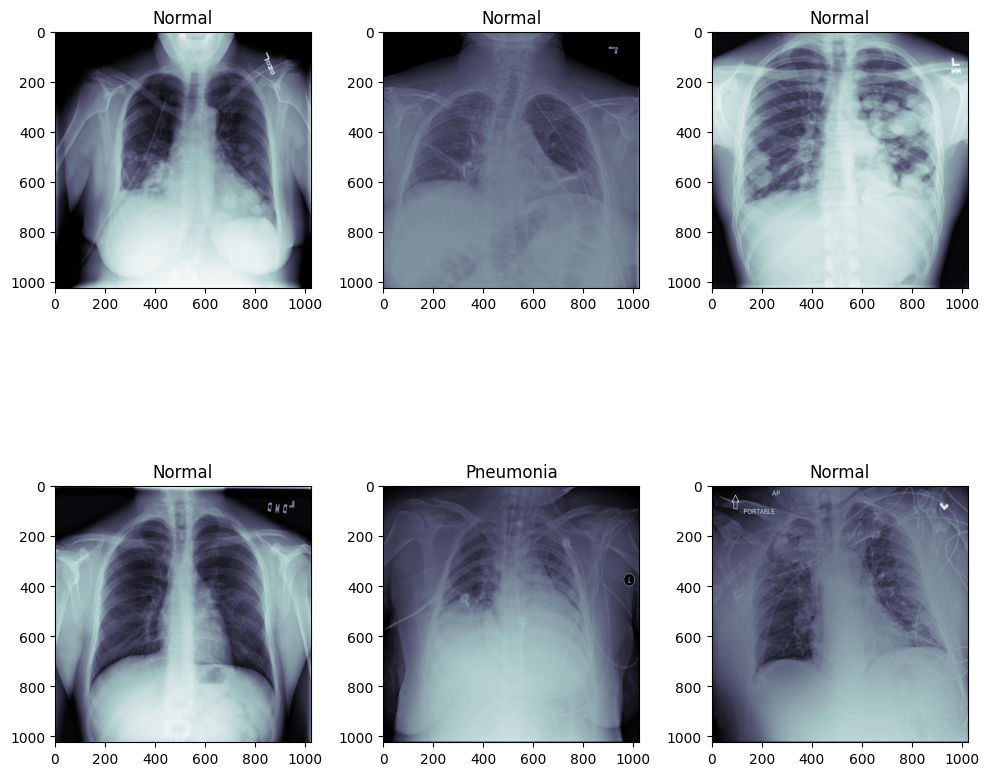

In [ ]:
fig, axis = plt.subplots(2, 3, figsize=(10,10))

count = 0
for i in range(2):
    for j in range(3):
        patient_id = labels_csv["patientId"].iloc[count]
        target = labels_csv["Target"].iloc[count]

        file_path = root.joinpath(patient_id).with_suffix(".dcm")

        dicom_file = pydicom.read_file(file_path).pixel_array
        label = "Pneumonia" if target == 1 else "Normal"

        axis[i][j].imshow(dicom_file, cmap='bone')
        axis[i][j].set_title(label)


        count += 1

plt.tight_layout()
plt.show()

In [ ]:
# !rm -rf /content/Preprocessed

In [ ]:
from sklearn.model_selection import train_test_split
train_size = 0.8

train_csv, val_csv = train_test_split(labels_csv, train_size=train_size)

In [ ]:
def create_dataset(path, labels_csv):
  output_folder = Path(path)

  for index, row in tqdm(labels_csv.iterrows()):
    file_name = row["patientId"]
    target = row["Target"]

    label = "Pneumonia" if target == 1 else "Normal"

    file_path = root.joinpath(file_name).with_suffix(".dcm")

    dicom_arr = pydicom.read_file(file_path).pixel_array / 255

    image_resized = cv2.resize(dicom_arr, (224, 224))

    output_path_class = output_folder/label
    output_path_class.mkdir(parents=True, exist_ok = True)
    np.save(output_path_class/file_name, image_resized)

In [ ]:
create_dataset("/content/Preprocessed/train", train_csv)
create_dataset("/content/Preprocessed/val", val_csv)

21347it [04:27, 79.67it/s]
5337it [01:06, 79.90it/s] 


In [ ]:
import os

print(f"Train Normal Class: {len(os.listdir('/content/Preprocessed/train/Normal'))}", f"Train Pneumonia Class: {len(os.listdir('/content/Preprocessed/train/Pneumonia'))}")
print(f"Val Normal Class: {len(os.listdir('/content/Preprocessed/val/Normal'))}", f"Val Pneumonia Class: {len(os.listdir('/content/Preprocessed/val/Pneumonia'))}")

Train Normal Class: 16547 Train Pneumonia Class: 4800
Val Normal Class: 4125 Val Pneumonia Class: 1212


# Training

In [ ]:
import torch
import torchvision
from torchvision import transforms
from tqdm.notebook import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.49, 0.248),
    transforms.RandomAffine(degrees=(-5, 5), scale=(0.9, 1.1)),
    transforms.RandomResizedCrop((224, 224))
])

val_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.49, 0.248)
])

In [ ]:
def load_file(path):
  channel_one = np.load(path).astype(np.float32)

  rgb_like_image = np.stack([channel_one, channel_one, channel_one], axis = -1)

  return rgb_like_image

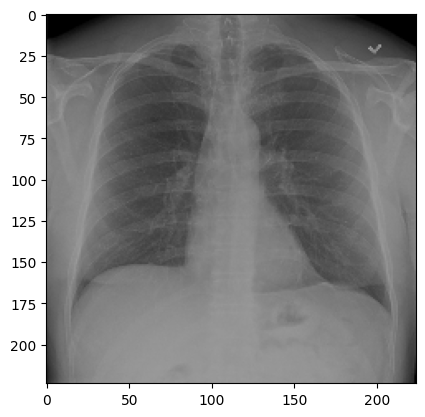

In [ ]:
image = load_file("/content/Preprocessed/train/Normal/0010f549-b242-4e94-87a8-57d79de215fc.npy")
plt.imshow(image, cmap = "bone")

In [ ]:
train_dataset = torchvision.datasets.DatasetFolder("/content/Preprocessed/train", loader = load_file, extensions = ".npy", transform = train_transforms)
val_dataset = torchvision.datasets.DatasetFolder("/content/Preprocessed/val", loader = load_file, extensions = ".npy", transform = val_transforms)

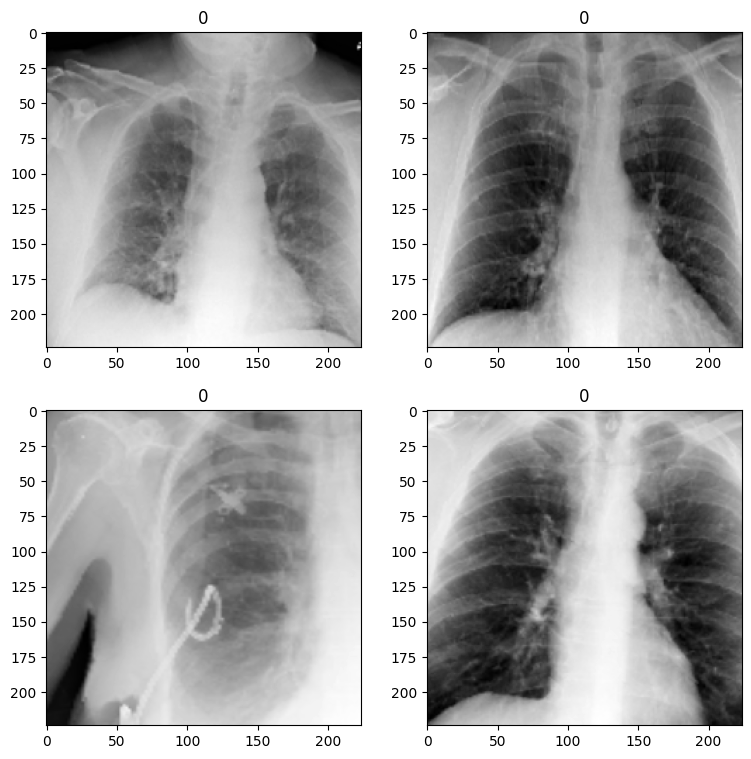

In [ ]:
fig, axis = plt.subplots(2, 2, figsize=(9, 9))

for i in range(2):
  for j in range(2):
    random_ind = np.random.randint(0, 21000)
    x_ray, label = train_dataset[random_ind]
    axis[i][j].imshow(x_ray[0], cmap="gray")
    axis[i][j].set_title(label)

In [ ]:
batch_size = 64
num_workers = 2
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = batch_size, num_workers = num_workers, shuffle = True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size = batch_size, num_workers = num_workers)

In [ ]:
class PneumoniaModel(torch.nn.Module):
  def __init__(self):
    super(PneumoniaModel, self).__init__()

    self.model = torchvision.models.resnet34(pretrained = True)

    self.model.fc = torch.nn.Linear(in_features = 512, out_features=1, bias = True)

    self.feature_map = torch.nn.Sequential(*list(self.model.children())[:-2])

  def forward(self, x):
    feature_map = self.feature_map(x)
    pred = self.model(x)

    return pred, feature_map


In [ ]:
# Check if CUDA is available
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("CUDA is available. Using GPU.")
else:
    device = torch.device("cpu")
    print("CUDA is not available. Using CPU.")

CUDA is available. Using GPU.


In [ ]:
model = PneumoniaModel().to(device)
criterion = torch.nn.BCEWithLogitsLoss(pos_weight = torch.tensor([3])).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma = 0.7)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 120MB/s]


In [ ]:
def calculate_accuracy(outputs, labels):
    preds = outputs >= 0.5
    correct = (preds == labels.byte()).float()  # Convert to float for division
    accuracy = correct.sum() / len(correct)

    return accuracy

In [ ]:
input = torch.randn((1, 3, 224, 224)).to(device)

preds, features = model(input)

print(preds.shape, features.shape)

torch.Size([1, 1]) torch.Size([1, 512, 7, 7])


In [ ]:
epochs = 25

for epoch in range(epochs):
  model.train()

  train_running_loss = 0.0
  train_running_accuracy = 0.0

  for inputs, labels in tqdm(train_loader):
    inputs, labels = inputs.to(device), labels.to(device)

    optimizer.zero_grad()

    outputs, features = model(inputs)

    loss = criterion(outputs.squeeze(), labels.float())

    accuracy = calculate_accuracy(outputs.squeeze(), labels)

    loss.backward()
    optimizer.step()

    train_running_loss += loss
    train_running_accuracy += accuracy

  train_loss = train_running_loss / len(train_loader)
  train_accuracy = train_running_accuracy / len(train_loader)

  scheduler.step()

  model.eval()
  val_running_loss = 0.0
  val_running_accuracy = 0.0


  with torch.no_grad():
    for inputs, labels in tqdm(val_loader):
      inputs, labels = inputs.to(device), labels.to(device)

      outputs, features = model(inputs)

      loss = criterion(outputs.squeeze(), labels.float())

      accuracy = calculate_accuracy(outputs.squeeze(), labels)


      val_running_loss += loss
      val_running_accuracy += accuracy

    val_loss = val_running_loss / len(val_loader)
    val_accuracy = val_running_accuracy / len(val_loader)

  print(f'Epoch {epoch + 1}, Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}')


  0%|          | 0/334 [00:00<?, ?it/s]

  0%|          | 0/84 [00:00<?, ?it/s]

Epoch 1, Train Loss: 0.7182, Train Acc: 0.8069, Val Loss: 0.6570, Val Acc: 0.8441


  0%|          | 0/334 [00:00<?, ?it/s]

  0%|          | 0/84 [00:00<?, ?it/s]

Epoch 2, Train Loss: 0.6845, Train Acc: 0.8186, Val Loss: 0.6713, Val Acc: 0.8489


  0%|          | 0/334 [00:00<?, ?it/s]

  0%|          | 0/84 [00:00<?, ?it/s]

Epoch 3, Train Loss: 0.6664, Train Acc: 0.8213, Val Loss: 0.6510, Val Acc: 0.8451


  0%|          | 0/334 [00:00<?, ?it/s]

  0%|          | 0/84 [00:00<?, ?it/s]

Epoch 4, Train Loss: 0.6639, Train Acc: 0.8203, Val Loss: 0.6147, Val Acc: 0.8167


  0%|          | 0/334 [00:00<?, ?it/s]

  0%|          | 0/84 [00:00<?, ?it/s]

Epoch 5, Train Loss: 0.6427, Train Acc: 0.8274, Val Loss: 0.6081, Val Acc: 0.8324


  0%|          | 0/334 [00:00<?, ?it/s]

  0%|          | 0/84 [00:00<?, ?it/s]

Epoch 6, Train Loss: 0.6212, Train Acc: 0.8336, Val Loss: 0.6131, Val Acc: 0.8178


  0%|          | 0/334 [00:00<?, ?it/s]

  0%|          | 0/84 [00:00<?, ?it/s]

Epoch 7, Train Loss: 0.6075, Train Acc: 0.8354, Val Loss: 0.6058, Val Acc: 0.8358


  0%|          | 0/334 [00:00<?, ?it/s]

  0%|          | 0/84 [00:00<?, ?it/s]

Epoch 8, Train Loss: 0.6038, Train Acc: 0.8392, Val Loss: 0.6269, Val Acc: 0.8249


  0%|          | 0/334 [00:00<?, ?it/s]

  0%|          | 0/84 [00:00<?, ?it/s]

Epoch 9, Train Loss: 0.5877, Train Acc: 0.8392, Val Loss: 0.6692, Val Acc: 0.8327


  0%|          | 0/334 [00:00<?, ?it/s]

  0%|          | 0/84 [00:00<?, ?it/s]

Epoch 10, Train Loss: 0.5858, Train Acc: 0.8408, Val Loss: 0.6436, Val Acc: 0.8351


  0%|          | 0/334 [00:00<?, ?it/s]

  0%|          | 0/84 [00:00<?, ?it/s]

Epoch 11, Train Loss: 0.5551, Train Acc: 0.8508, Val Loss: 0.6724, Val Acc: 0.8322


  0%|          | 0/334 [00:00<?, ?it/s]

  0%|          | 0/84 [00:00<?, ?it/s]

Epoch 12, Train Loss: 0.5404, Train Acc: 0.8539, Val Loss: 0.7304, Val Acc: 0.8279


  0%|          | 0/334 [00:00<?, ?it/s]

  0%|          | 0/84 [00:00<?, ?it/s]

Epoch 13, Train Loss: 0.5261, Train Acc: 0.8585, Val Loss: 0.7009, Val Acc: 0.8257


  0%|          | 0/334 [00:00<?, ?it/s]

  0%|          | 0/84 [00:00<?, ?it/s]

Epoch 14, Train Loss: 0.5068, Train Acc: 0.8641, Val Loss: 0.7417, Val Acc: 0.8310


  0%|          | 0/334 [00:00<?, ?it/s]

  0%|          | 0/84 [00:00<?, ?it/s]

Epoch 15, Train Loss: 0.4922, Train Acc: 0.8677, Val Loss: 0.8270, Val Acc: 0.8406


  0%|          | 0/334 [00:00<?, ?it/s]

  0%|          | 0/84 [00:00<?, ?it/s]

Epoch 16, Train Loss: 0.4607, Train Acc: 0.8762, Val Loss: 0.8468, Val Acc: 0.8298


  0%|          | 0/334 [00:00<?, ?it/s]

  0%|          | 0/84 [00:00<?, ?it/s]

Epoch 17, Train Loss: 0.4384, Train Acc: 0.8818, Val Loss: 0.9721, Val Acc: 0.8373


  0%|          | 0/334 [00:00<?, ?it/s]

  0%|          | 0/84 [00:00<?, ?it/s]

Epoch 18, Train Loss: 0.4277, Train Acc: 0.8868, Val Loss: 0.8742, Val Acc: 0.8177


  0%|          | 0/334 [00:00<?, ?it/s]

  0%|          | 0/84 [00:00<?, ?it/s]

Epoch 19, Train Loss: 0.4097, Train Acc: 0.8914, Val Loss: 0.8852, Val Acc: 0.8174


  0%|          | 0/334 [00:00<?, ?it/s]

  0%|          | 0/84 [00:00<?, ?it/s]

Epoch 20, Train Loss: 0.3978, Train Acc: 0.8964, Val Loss: 0.9616, Val Acc: 0.8236


  0%|          | 0/334 [00:00<?, ?it/s]

  0%|          | 0/84 [00:00<?, ?it/s]

Epoch 21, Train Loss: 0.3676, Train Acc: 0.9011, Val Loss: 1.1063, Val Acc: 0.8326


  0%|          | 0/334 [00:00<?, ?it/s]

  0%|          | 0/84 [00:00<?, ?it/s]

Epoch 22, Train Loss: 0.3492, Train Acc: 0.9110, Val Loss: 1.2964, Val Acc: 0.8268


  0%|          | 0/334 [00:00<?, ?it/s]

  0%|          | 0/84 [00:00<?, ?it/s]

Epoch 23, Train Loss: 0.3416, Train Acc: 0.9109, Val Loss: 1.2168, Val Acc: 0.8195


  0%|          | 0/334 [00:00<?, ?it/s]

  0%|          | 0/84 [00:00<?, ?it/s]

Epoch 24, Train Loss: 0.3302, Train Acc: 0.9148, Val Loss: 1.2601, Val Acc: 0.8240


  0%|          | 0/334 [00:00<?, ?it/s]

  0%|          | 0/84 [00:00<?, ?it/s]

Epoch 25, Train Loss: 0.3323, Train Acc: 0.9156, Val Loss: 1.2073, Val Acc: 0.8229


In [ ]:
model_save_path = 'models/pneumonia_classification_RESNET34.pth'
torch.save(model.state_dict(), model_save_path)